In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the synthetic dataset
data_path = 'synthetic_health_monitoring_data.csv'
data = pd.read_csv(data_path)

# Preprocessing
# Encode categorical variables (gender and risk_level)
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['risk_level'] = label_encoder.fit_transform(data['risk_level'])

# Separate features and target variable
X = data.drop(['date', 'risk_level'], axis=1)
y = data['risk_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=500)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Logistic Regression: {accuracy:.2f}")


Accuracy of Logistic Regression: 0.83


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Compute accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN: {accuracy_knn:.2f}")


Accuracy of KNN: 0.79


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Compute accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy_dt:.2f}")


Accuracy of Decision Tree: 0.99


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.2f}")


Accuracy of Random Forest: 0.99


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Naive Bayes Classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = naive_bayes_model.predict(X_test)

# Compute accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes: {accuracy_nb:.2f}")


Accuracy of Naive Bayes: 0.83


=== Logistic Regression ===

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.82      0.89      0.86       150
           2       0.86      0.75      0.80       118

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

AUC: 0.94


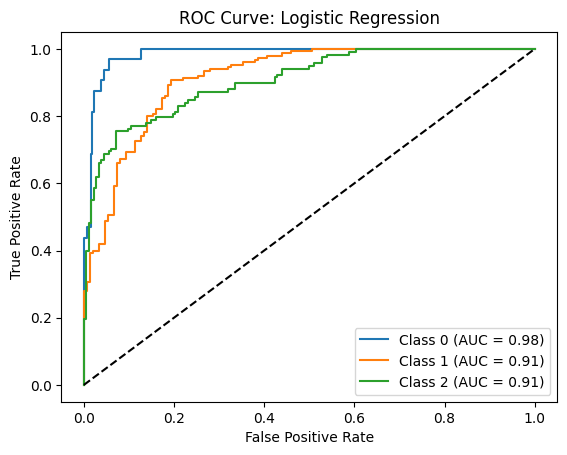

=== KNN ===

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.58        32
           1       0.80      0.84      0.82       150
           2       0.85      0.79      0.82       118

    accuracy                           0.79       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.80      0.79      0.79       300

AUC: 0.92


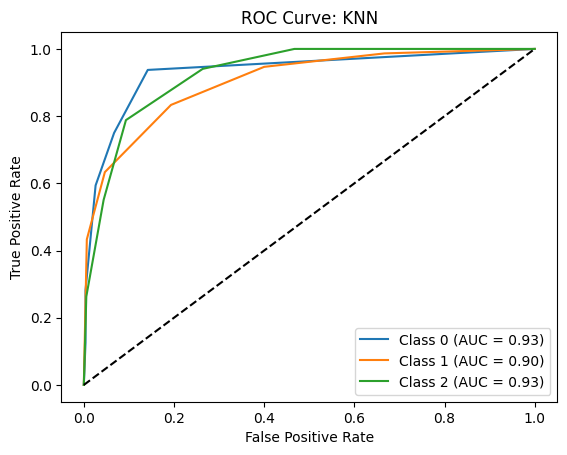

=== Decision Tree ===

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.99      1.00      1.00       150
           2       1.00      0.99      1.00       118

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

AUC: 0.99


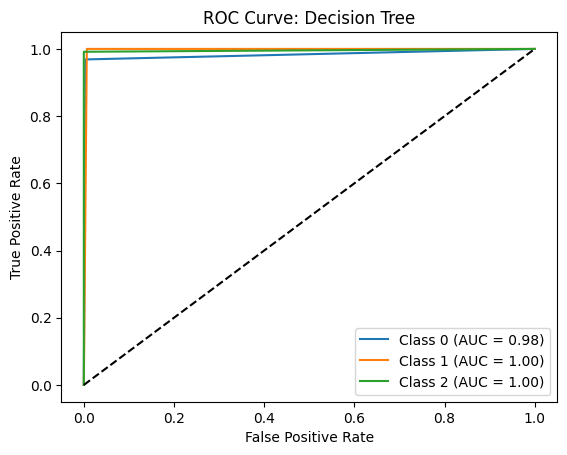

=== Random Forest ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.99      1.00      1.00       150
           2       0.99      1.00      1.00       118

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300

AUC: 1.00


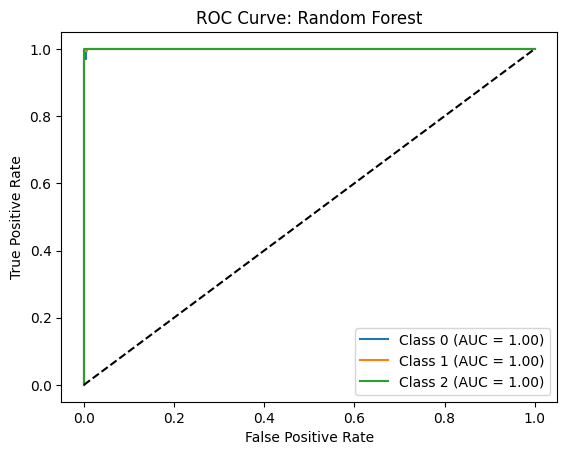

=== Naive Bayes ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.83      0.84      0.84       150
           2       0.78      0.81      0.79       118

    accuracy                           0.83       300
   macro avg       0.87      0.83      0.85       300
weighted avg       0.83      0.83      0.83       300

AUC: 0.95


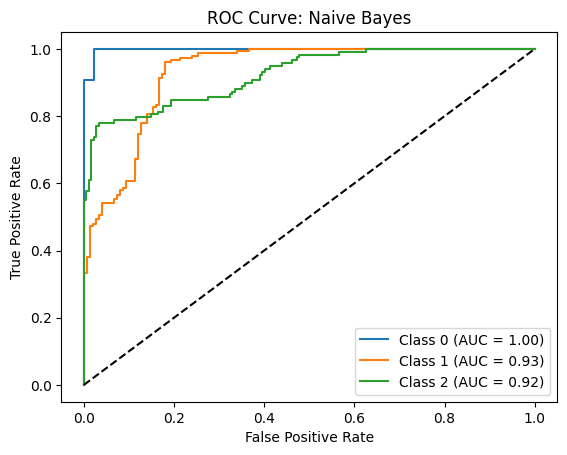

In [7]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the target variable for AUC calculation (multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes for risk levels: Low, Moderate, High

# Function to compute and display metrics
def evaluate_model(y_test, y_pred, y_prob=None, model_name="Model"):
    print(f"=== {model_name} ===")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # AUC Score (if probabilities are available)
    if y_prob is not None:
        auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr")
        print(f"AUC: {auc:.2f}")
        
        # Plot ROC curve
        plt.figure()
        for i in range(y_test_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"ROC Curve: {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

# Evaluate each model
models = {
    "Logistic Regression": (logistic_model, logistic_model.predict_proba(X_test)),
    "KNN": (knn_model, knn_model.predict_proba(X_test)),
    "Decision Tree": (decision_tree_model, decision_tree_model.predict_proba(X_test)),
    "Random Forest": (random_forest_model, random_forest_model.predict_proba(X_test)),
    "Naive Bayes": (naive_bayes_model, naive_bayes_model.predict_proba(X_test)),
}

for model_name, (model, y_prob) in models.items():
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, y_prob, model_name=model_name)


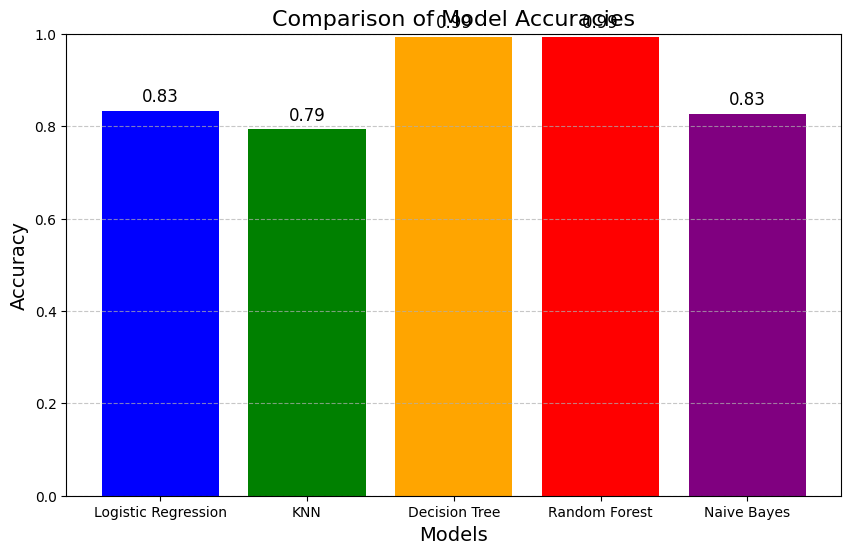

In [8]:
import matplotlib.pyplot as plt

# Collect accuracies of all models
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, logistic_model.predict(X_test)),
    "KNN": accuracy_score(y_test, knn_model.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, decision_tree_model.predict(X_test)),
    "Random Forest": accuracy_score(y_test, random_forest_model.predict(X_test)),
    "Naive Bayes": accuracy_score(y_test, naive_bayes_model.predict(X_test)),
}

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Comparison of Model Accuracies", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with accuracy values
for i, (model, acc) in enumerate(model_accuracies.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.show()


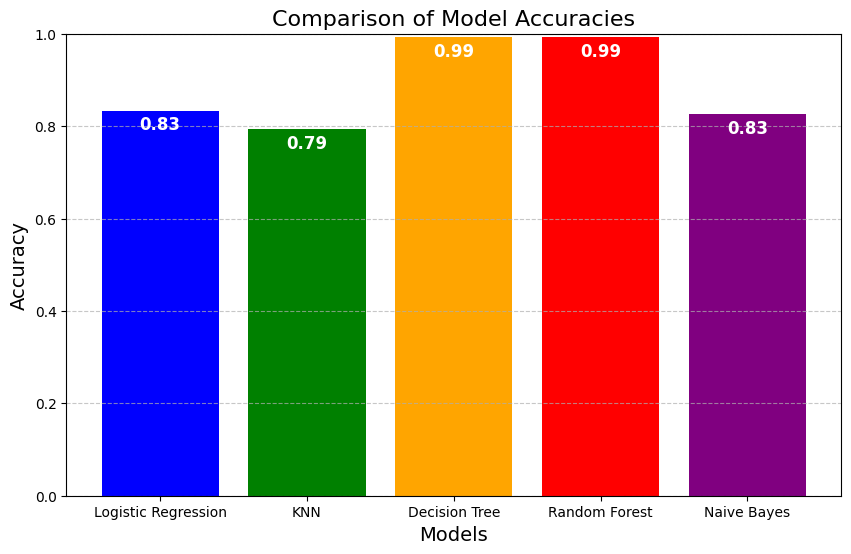

In [9]:
import matplotlib.pyplot as plt

# Collect accuracies of all models
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, logistic_model.predict(X_test)),
    "KNN": accuracy_score(y_test, knn_model.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, decision_tree_model.predict(X_test)),
    "Random Forest": accuracy_score(y_test, random_forest_model.predict(X_test)),
    "Naive Bayes": accuracy_score(y_test, naive_bayes_model.predict(X_test)),
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Comparison of Model Accuracies", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with accuracy values inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.05, f"{height:.2f}",
             ha='center', va='bottom', fontsize=12, color='white', weight='bold')

plt.show()


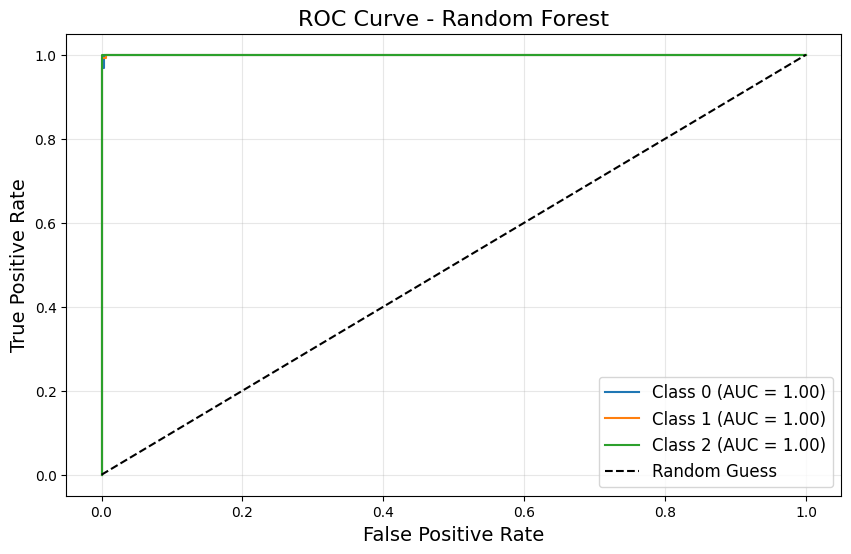

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the test labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust `classes` based on the unique values in your target

# Predict probabilities using the Random Forest model
y_prob_rf = random_forest_model.predict_proba(X_test)

# Compute ROC and AUC for each class
plt.figure(figsize=(10, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob_rf[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Customize the plot
plt.title("ROC Curve - Random Forest", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


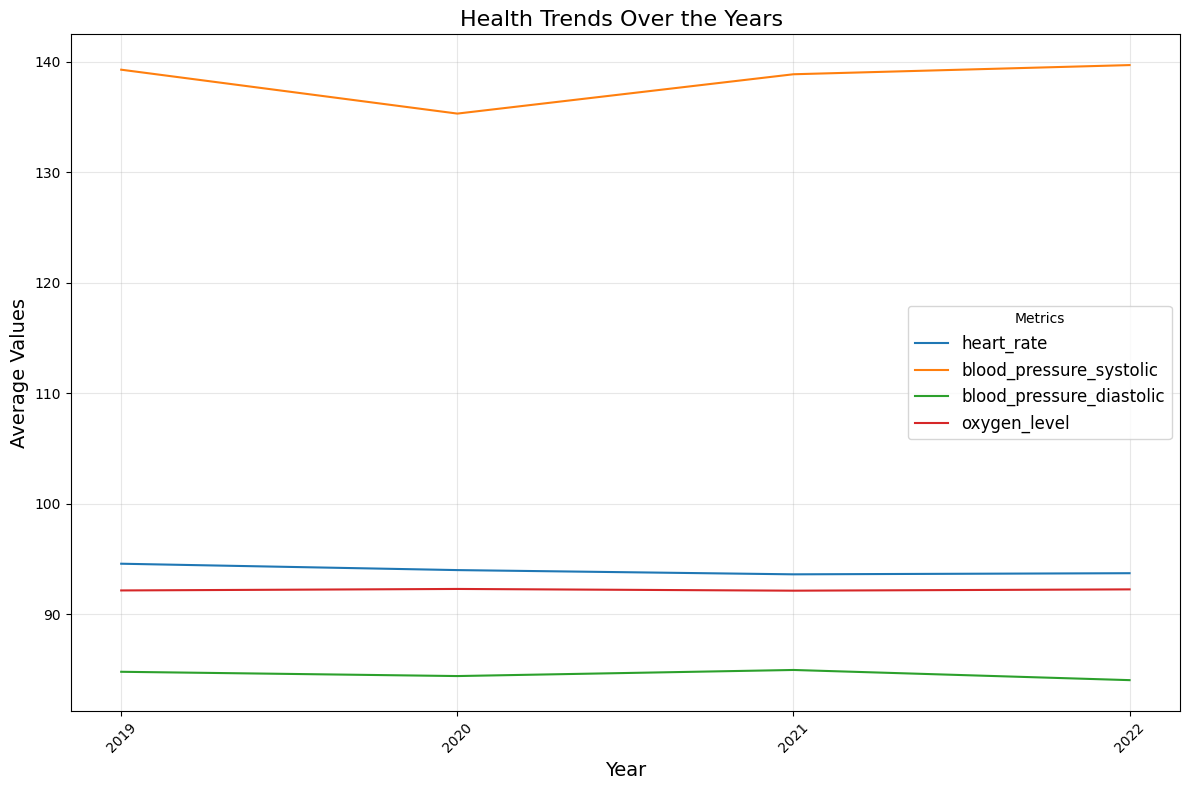

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the synthetic dataset
data_path = 'updated_health_monitoring_data_2019_2023.csv'  # Update with your actual file path
data = pd.read_csv(data_path)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Extract the year from the date
data['year'] = data['date'].dt.year

# Group data by year and calculate mean values for health metrics
health_trends = data.groupby('year')[['heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'oxygen_level']].mean()

# Filter data to include only years up to 2022
health_trends_till_2022 = health_trends[health_trends.index <= 2022]

# Plot trends for each health metric till 2022
plt.figure(figsize=(12, 8))
for column in health_trends_till_2022.columns:
    plt.plot(health_trends_till_2022.index, health_trends_till_2022[column], label=column)

# Customize the plot
plt.title("Health Trends Over the Years ", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Values", fontsize=14)
plt.legend(title="Metrics", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(health_trends_till_2022.index, rotation=45)
plt.tight_layout()
plt.show()


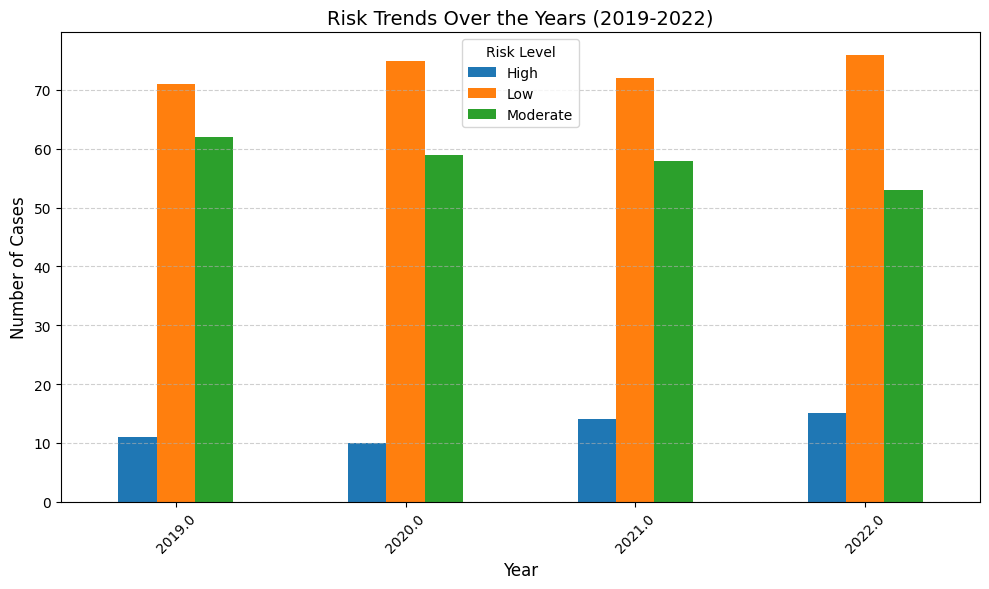

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime and extract the year (if not done already)
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data['year'] = data['date'].dt.year

# Filter the data to include only entries up to the year 2022
filtered_data = data[data['year'] <= 2022]

# Group by year and risk_level to count occurrences
filtered_risk_trends = filtered_data.groupby(['year', 'risk_level']).size().unstack(fill_value=0)

# Bar chart for risk trends (2019-2022)
filtered_risk_trends.plot(kind='bar', figsize=(10, 6))
plt.title('Risk Trends Over the Years (2019-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Risk Level')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


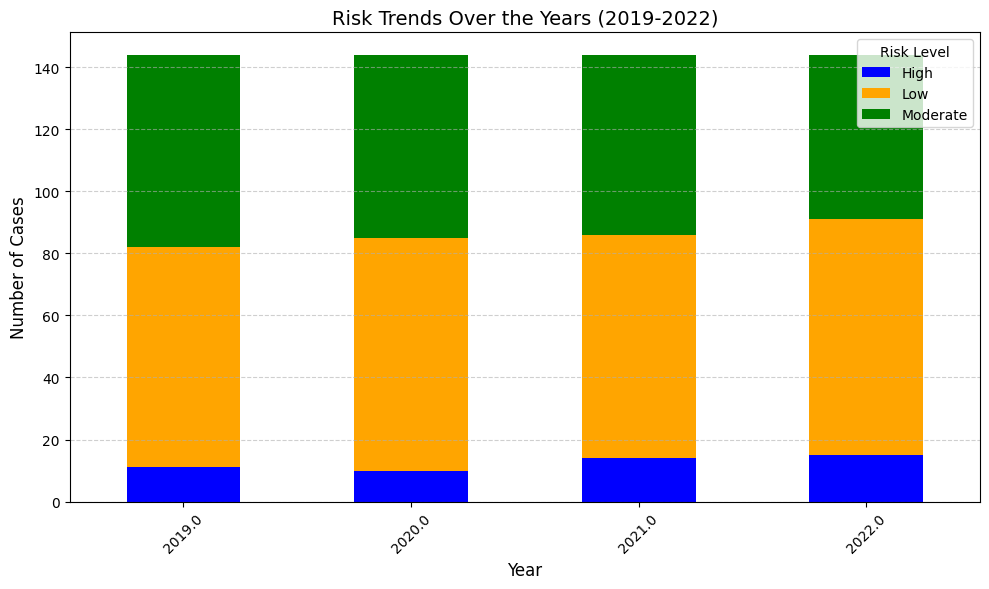

In [20]:
# Stacked bar chart with custom colors
filtered_risk_trends.plot(kind='bar', stacked=True, figsize=(10, 6), color=[ 'blue','orange', 'green'])
plt.title('Risk Trends Over the Years (2019-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Risk Level')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


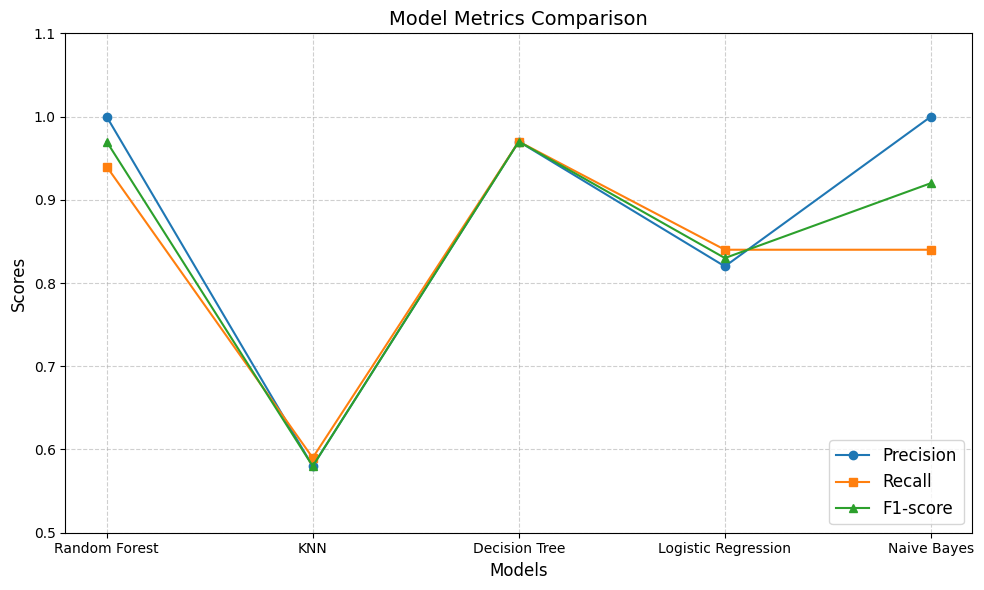

In [1]:
import matplotlib.pyplot as plt

# Data for the models and their metrics
models = ["Random Forest", "KNN", "Decision Tree", "Logistic Regression", "Naive Bayes"]
precision = [1.00, 0.58, 0.97, 0.82, 1.00]
recall = [0.94, 0.59, 0.97, 0.84, 0.84]
f1_score = [0.97, 0.58, 0.97, 0.83, 0.92]

# Plotting the metrics for comparison
plt.figure(figsize=(10, 6))
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='s', label='Recall')
plt.plot(models, f1_score, marker='^', label='F1-score')

# Adding titles and labels
plt.title("Model Metrics Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.ylim(0.5, 1.1)  # Adjust the y-axis to better visualize differences

# Adding grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()
